<a href="https://colab.research.google.com/github/Varun-531/FML/blob/main/lasso_reg_StartUps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [2]:
data = pd.read_csv("/content/50_Startups (1).csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
data.shape

(50, 5)

In [7]:
data.drop_duplicates(keep="first",inplace=True)

In [8]:
data.shape

(50, 5)

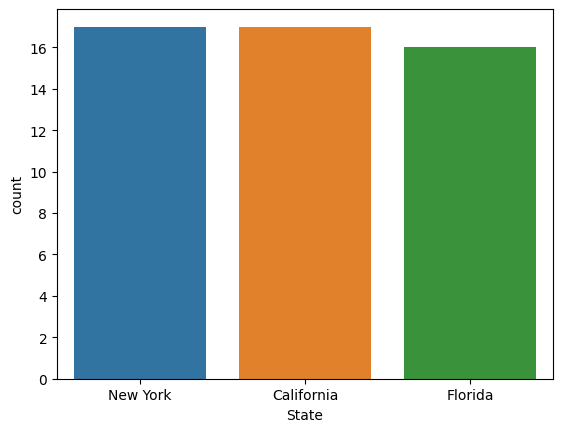

In [9]:
sns.countplot(data=data,x=data["State"])
plt.show()

<ipython-input-10-dff020e25490>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


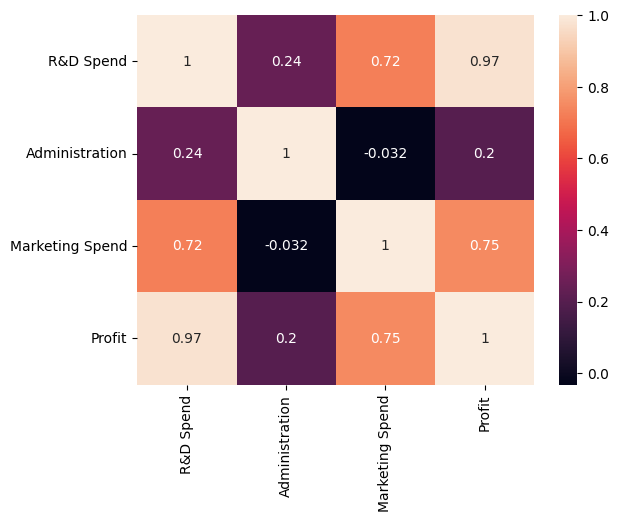

In [10]:
sns.heatmap(data.corr(),annot=True)
plt.show()


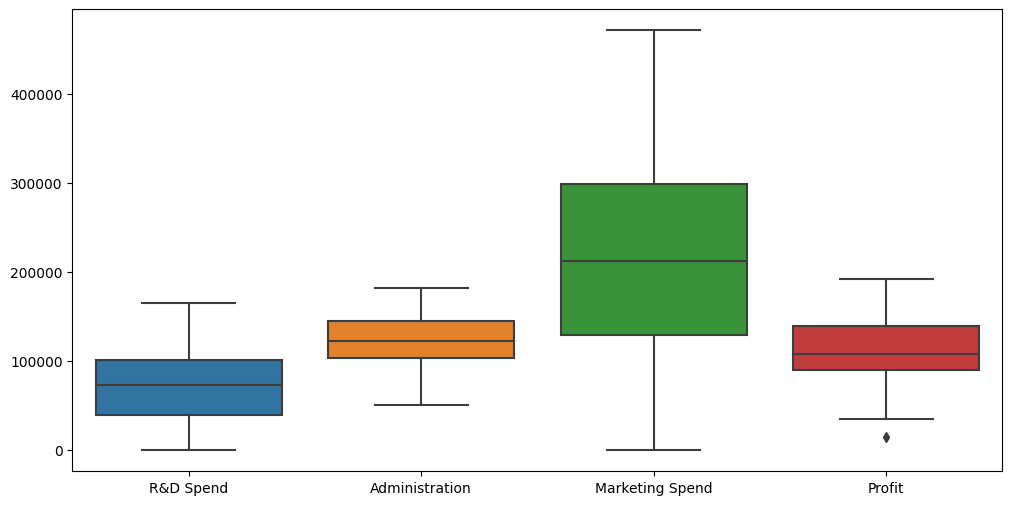

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.show()

In [12]:
# removing outliers
q1 = data["Profit"].quantile(0.25)
q3 = data["Profit"].quantile(0.75)
iqr=q3-q1
print(iqr)

49627.07499999998


In [13]:
up=q3+1.5*iqr
down=q1-1.5*iqr

print(up,down)

214206.58999999997 15698.290000000023


In [14]:
#1st method
outlier=[]
profit=data["Profit"]

for i in profit:
    if i>up:
        outlier.append(i)
        print("Up Outlier",i)
        
for i in profit:
    if i<down:
        outlier.append(i)
        print("Down Outlier",i)


Down Outlier 14681.4


In [17]:
data["Profit"]=data["Profit"].replace(outlier,data["Profit"].mean())
     

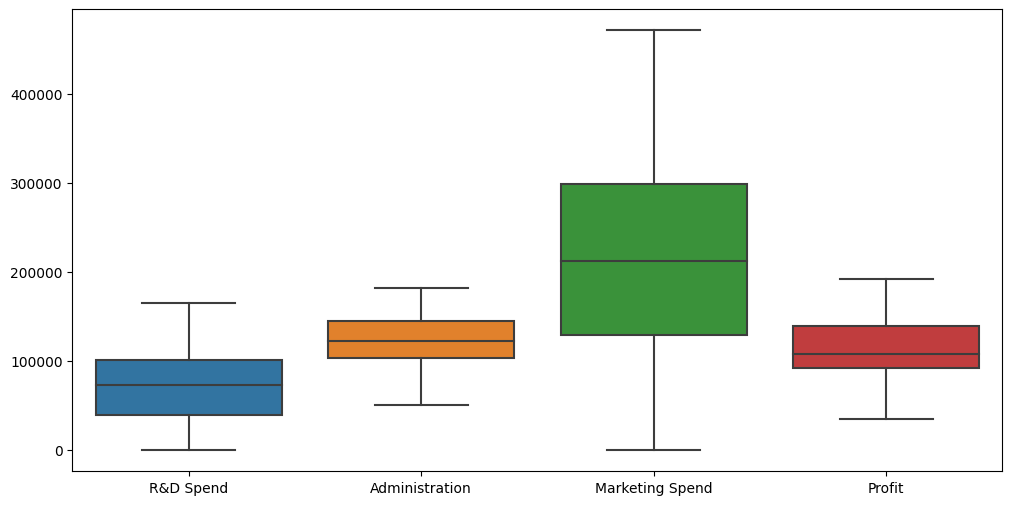

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.show()

In [19]:
X = data.drop('Profit',axis=1)
y = data['Profit']

In [20]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [21]:
dum = pd.get_dummies(data['State'])
dum.head()


,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [22]:
X = X.drop('State',axis=1)
X.head()
     

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [23]:
X = pd.concat([X,dum],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [25]:
from sklearn.linear_model import Lasso
reg=Lasso(alpha=0.12)
reg.fit(X_train,y_train)

Lasso(alpha=0.12)

In [26]:
y_predict = reg.predict(X_train)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(y_train,y_predict)
MSE = mean_squared_error(y_train,y_predict)
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
R2_SCORE = r2_score(y_train,y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)
     

MAE : 7554.468081274995
MSE : 138392821.7180457
RMSE : 11764.0478457904
R2_SCORE : 0.9081500348293419


In [27]:
y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 7508.333490842753
MSE : 84790202.65171124
RMSE : 9208.15956919249
R2_SCORE : 0.9214026446667702
